# Chapter 1

In [1]:
import requests_cache
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from statsmodels.tsa.stattools import acf

In [2]:
session = requests_cache.CachedSession('yfinance.cache')
session.headers['User-Leonardo'] = 'Chapter_1'

In [8]:
ticker = 'GC=F'
data = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [9]:
prices = data.Close[ticker]
prices

Date
2000-08-30     273.899994
2000-08-31     278.299988
2000-09-01     277.000000
2000-09-05     275.799988
2000-09-06     274.200012
                 ...     
2025-02-24    2947.899902
2025-02-25    2904.500000
2025-02-26    2916.800049
2025-02-27    2883.199951
2025-02-28    2867.300049
Name: GC=F, Length: 6147, dtype: float64

In [10]:
prices.describe()

count    6147.000000
mean     1172.018448
std       594.010026
min       255.100006
25%       633.799988
50%      1236.199951
75%      1628.400024
max      2947.899902
Name: GC=F, dtype: float64

In [11]:
prices = prices.to_numpy()

In [12]:
dates = data.Close[ticker].index

## Returns

In [13]:
returns = np.log(prices[1:])- np.log(prices[:-1])
mean = returns.mean()
variance = returns.var()
print('average = ',mean, '\nvariance = ', variance)

average =  0.00038209617026498 
variance =  0.00011792358757804685


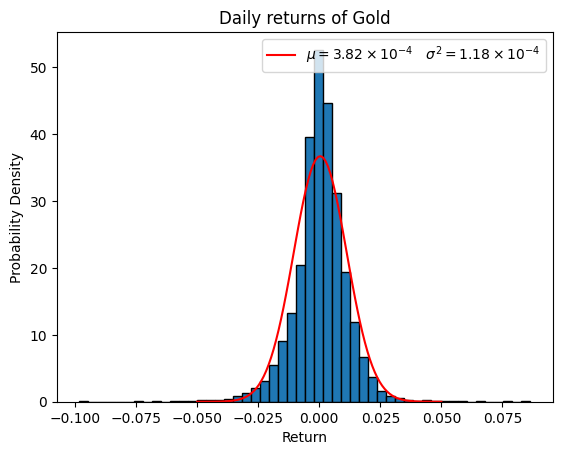

In [37]:
# Generate a range of x values for the normal distribution
x = np.linspace(-0.05, 0.05, 100)
# Evaluate the normal distribution at the x values
y = sp.stats.norm(loc =mean, scale = np.sqrt(variance)).pdf(x)

# Plot the histogram
plt.hist(returns, bins=50, edgecolor='black', density=True)
# Plot the fitted distribution
plt.plot(x, y, 'r-', label=r'$\mu = 3.82\times 10^{-4} \quad \sigma^2 = 1.18\times 10^{-4}$')
plt.xlabel('Return')
plt.ylabel('Probability Density')
plt.title('Daily returns of Gold')
plt.legend()
plt.show()

## Autocorrelations

In [25]:
max_lag = 100
# Calculate autocorrelation for lags 1 to 100
autocorr_values = acf(returns, nlags=max_lag)

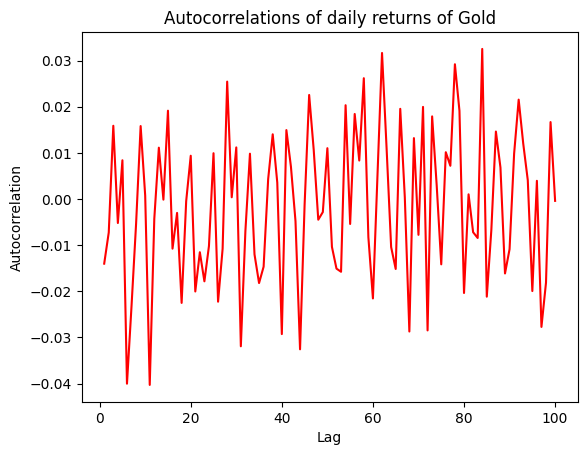

In [26]:
x = np.arange(max_lag+1)

plt.plot(x[1:], autocorr_values[1:], 'r-')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelations of daily returns of Gold')
plt.show()

## Squared Autocorrelations

In [27]:
# Calculate autocorrelation for lags 1 to 100
sq_autocorr_values = acf(returns**2, nlags=max_lag)

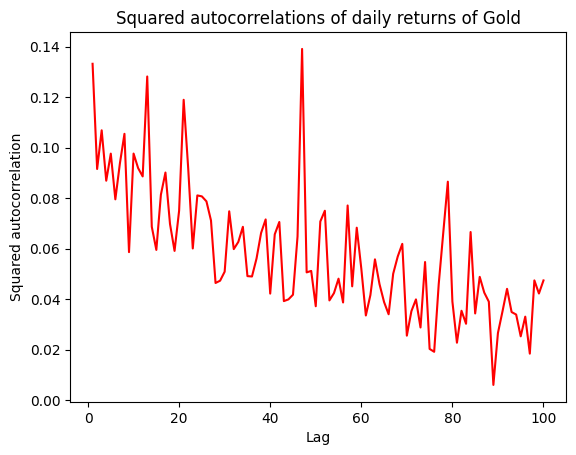

In [28]:
plt.plot(x[1:], sq_autocorr_values[1:], 'r-')
plt.xlabel('Lag')
plt.ylabel('Squared autocorrelation')
plt.title('Squared autocorrelations of daily returns of Gold')
plt.show()

## Riskmetrics

In [29]:
def risk_metrics(returns, persistence):
    t_max = len(returns)
    volatility = np.zeros(t_max)
    volatility[0] = returns.var()
    for t in range(1, t_max):
        volatility[t] = persistence*volatility[t-1] + (1-persistence)*returns[t]**2
    return volatility

In [30]:
volatility = risk_metrics(returns, 0.94)

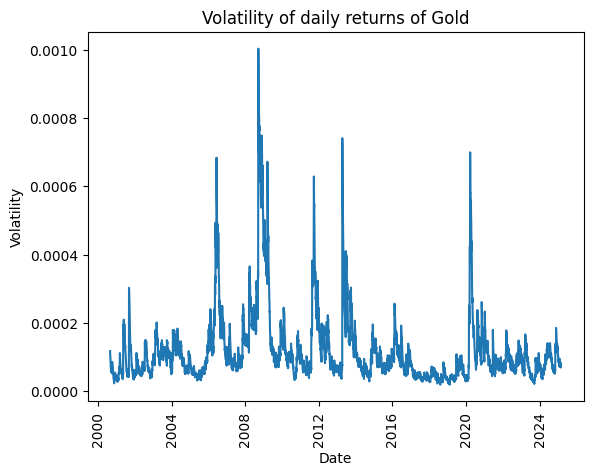

In [31]:
plt.plot(dates[:-1],volatility)
# rotate x-tick-labels by 90°
plt.tick_params(axis='x',rotation=90)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility of daily returns of Gold')
plt.show()

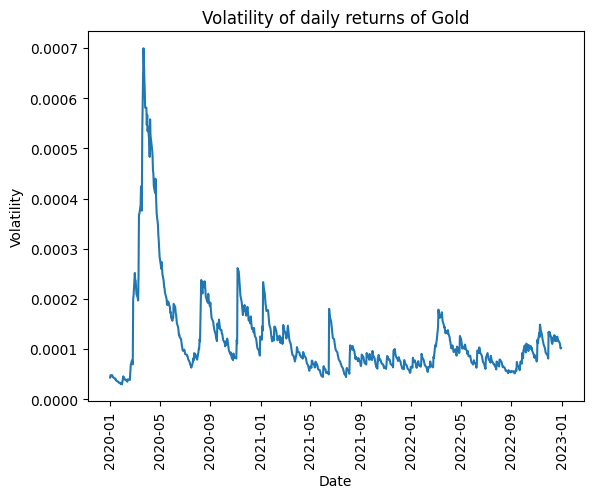

In [32]:
start_date = np.datetime64('2020-01-01')
end_date = np.datetime64('2022-12-31')

mask = (dates[:-1] >= start_date) & (dates[:-1] <= end_date)

plt.plot(dates[:-1][mask], volatility[mask])
# rotate x-tick-labels by 90°
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility of daily returns of Gold')
plt.show()

## VaR
Assuming gaussian distribution of portfolio returns

In [33]:
p = 0.01
quantile = sp.stats.norm.ppf(p, loc=mean, scale=np.sqrt(variance))
print(-quantile)

0.024880326653042774


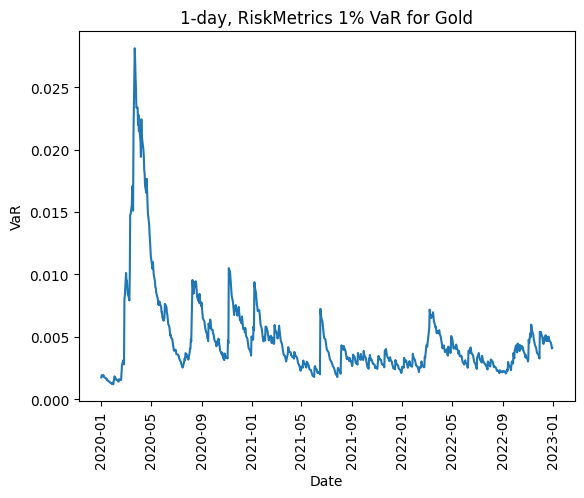

In [36]:
plt.plot(dates[:-1][mask], -quantile ** (-1) * volatility[mask])
# rotate x-tick-labels by 90°
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Date')
plt.ylabel('VaR')
plt.title('1-day, RiskMetrics 1% VaR for Gold')
plt.show()